In [2]:
# imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [4]:
dat.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Find a better way to do this, something like DF.apply
for i in range(len(dat)):
    if dat.yr_renovated[i] == 0:
        dat.yr_renovated = dat.yr_built

In [6]:
dat = dat.drop(['id', 'date', 'lat', 'long'], axis=1)

In [9]:
dat_encoded = dat[['price', 'waterfront']]
dat_cat = dat[['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'zipcode']]
dat_num = dat.drop(dat_encoded.columns.append(dat_cat.columns), axis=1)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1180,5650,1180,0,1955,1955,1340,5650
1,2570,7242,2170,400,1951,1951,1690,7639
2,770,10000,770,0,1933,1933,2720,8062
3,1960,5000,1050,910,1965,1965,1360,5000
4,1680,8080,1680,0,1987,1987,1800,7503


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dat_num)
minMax = pd.DataFrame(scaler.transform(dat_num))
minMax.head()

,0,1,2,3,4,5,6,7
0,0.067170,0.003108,0.097588,0.000000,0.478261,0.478261,0.161934,0.005742
1,0.172075,0.004072,0.206140,0.082988,0.443478,0.443478,0.222165,0.008027
2,0.036226,0.005743,0.052632,0.000000,0.286957,0.286957,0.399415,0.008513
3,0.126038,0.002714,0.083333,0.188797,0.565217,0.565217,0.165376,0.004996
4,0.104906,0.004579,0.152412,0.000000,0.756522,0.756522,0.241094,0.007871


In [54]:
mapper = {0:'sqft_living', 1:'sqft_lot', 2:'sqft_above', 3:'sqft_basement', 4:'yr_built', 5:'yr_renovated', 6:'sqft_living15', 7:'sqft_lot15'}
minMax.rename(mapper, axis=1, inplace=1)

In [55]:
dat_cat = pd.get_dummies(dat_cat.astype(str))

In [56]:
encoded = pd.concat([dat_cat, dat_num, dat_encoded], axis=1)
#encoded = pd.concat([dat_cat, minMax, dat_encoded], axis=1)

In [57]:
encoded.head()

,bedrooms_0,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,...,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,waterfront
0,0,0,0,0,0,1,0,0,0,0,...,1180,5650,1180,0,1955,0,1340,5650,221900.0,0
1,0,0,0,0,0,1,0,0,0,0,...,2570,7242,2170,400,1951,1991,1690,7639,538000.0,0
2,0,0,0,0,1,0,0,0,0,0,...,770,10000,770,0,1933,0,2720,8062,180000.0,0
3,0,0,0,0,0,0,0,1,0,0,...,1960,5000,1050,910,1965,0,1360,5000,604000.0,0
4,0,0,0,0,0,1,0,0,0,0,...,1680,8080,1680,0,1987,0,1800,7503,510000.0,0


In [58]:
import xgboost as xg
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE 
import numpy as np

In [59]:
model = xg.XGBRegressor(n_estimators = 100, sampling_method='gradient_based', tree_method = 'exact', num_parallel_tree = 50)

In [60]:
X = encoded.drop(['price'], axis=1)
y = encoded['price']

In [61]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=.2)

In [62]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [63]:
rmse = np.sqrt(MSE(y_test, predictions))
print("RMSE : % .2f" % (rmse))

RMSE :  139634.64


In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

In [169]:
train_dataset = encoded.sample(frac=0.8)
test_dataset = encoded.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

def root_mean_squared_error(y_true,y_pred):
        y_true = float(y_true)
        y_pred = float(y_pred)
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

combined_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(512, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(1)
])

combined_model.compile(loss=root_mean_squared_error, optimizer=tf.keras.optimizers.Adam(0.1))

In [170]:
%%time

history = combined_model.fit(
    train_features, train_labels,
    validation_split=0.2, epochs=25, verbose=0)

Wall time: 23 s


In [171]:
combined_model.evaluate(test_features, test_labels)

136/136 [==============================] - 0s 785us/step - loss: nan


nan

In [44]:
#layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu'),

In [133]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model

In [164]:
dnn_model = build_and_compile_model(normalizer)
#dnn_model.summary()

In [165]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=12)

Wall time: 4.26 s


In [166]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 200000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

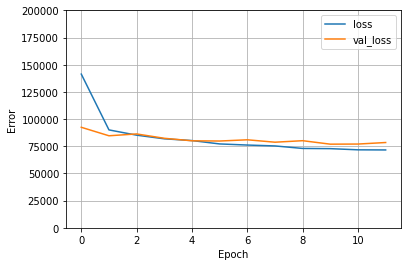

In [167]:
plot_loss(history)

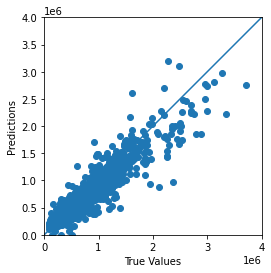

In [176]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 4000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)